In [40]:
import pandas as pd 
df = pd.read_csv('./bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [41]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [42]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [43]:
# Encoding
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder() 
df['job_encoded'] = encoder.fit_transform(df['job'])
df['marital_encoded'] = encoder.fit_transform(df['marital'])
df['education_encoded'] = encoder.fit_transform(df['education'])
df['housing_encoded'] = encoder.fit_transform(df['housing'])
df['loan_encoded'] = encoder.fit_transform(df['loan'])
df['contact_encoded'] = encoder.fit_transform(df['contact'])

In [44]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])
df['balance'] = scaler.fit_transform(df[['balance']])
df['duration'] = scaler.fit_transform(df[['duration']])
df['day'] = scaler.fit_transform(df[['day']])

In [45]:
numeric_df = df.select_dtypes(include=['number'])
numeric_df.head()

,age,balance,day,duration,campaign,pdays,previous,job_encoded,marital_encoded,education_encoded,housing_encoded,loan_encoded,contact_encoded
0,1.491505,0.252525,-1.265746,1.930226,1,-1,0,0,1,1,1,0,2
1,1.239676,-0.459974,-1.265746,3.154612,1,-1,0,0,1,1,0,0,2
2,-0.019470,-0.080160,-1.265746,2.929901,1,-1,0,9,1,1,1,0,2
3,1.155733,0.293762,-1.265746,0.596366,1,-1,0,7,1,1,1,0,2
4,1.071790,-0.416876,-1.265746,0.867171,2,-1,0,0,1,2,0,0,2


In [46]:
df['deposit_encoded'] = encoder.fit_transform(df[['deposit']])

D:\Machine Learning\Ananconda\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
from sklearn.model_selection import train_test_split
X = numeric_df.iloc[: , :]
y = df['deposit_encoded']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [48]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(max_iter=1000)
model.fit(X_train , y_train)

LogisticRegression(max_iter=1000)

In [49]:
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score ,classification_report
print('Accuracy : ',accuracy_score(y_test,y_pred))
print("\nClassificationReport:\n", classification_report(y_test, y_pred))
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Accuracy :  0.7908643081056874

ClassificationReport:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      1166
           1       0.79      0.76      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233

Intercept: [0.4890983]
Coefficients: [[ 0.06719862  0.09284833 -0.06030974  1.77488757 -0.13564268  0.00208084
   0.10431676  0.00748523  0.14404987  0.22026068 -1.00653412 -0.70402522
  -0.64265642]]


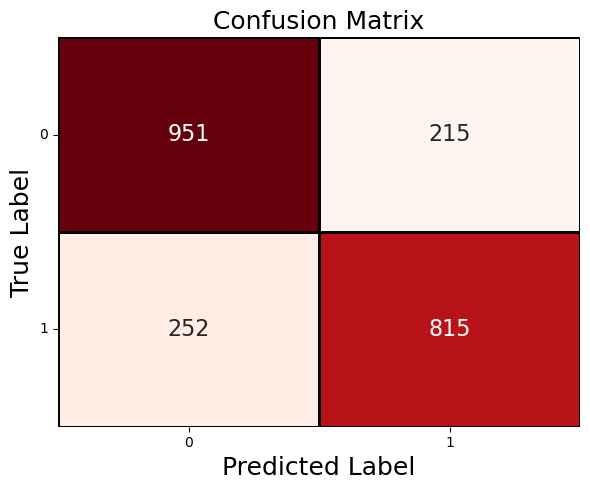

In [51]:
# Confusion Matrix 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
cbar=False, linewidths=1, linecolor='black', annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label', fontsize=18)
plt.ylabel('True Label', fontsize=18)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
